In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading the file that contains all the calculated lattice parameters via PSO:

In [2]:
with open("./2010_1823_optimizedparameters.obj",'rb') as f:
    optlatpar = pickle.load(f)
    

For each compound there were 500 particle. Each particle has information about the unit vectors and the cosine of the angles. With the next for loop, it is calculated the mean value of the population, and the cosines are transformed into the angles in degrees.

In [3]:
latpar = np.zeros((len(optlatpar),6))

for row in range(latpar.shape[0]):
    latpar[row] = optlatpar[row][0].mean(axis=0)

In [4]:
latpar[:,-3:] = np.rad2deg(np.arccos(latpar[:,-3:]))

In [5]:
latpar

array([[ 14.10536525,   9.17079398,   6.26854899,  91.08712948,
         92.85873041,  90.83191167],
       [ 20.45794521,  12.36576717,   6.81980086,  91.8392114 ,
         88.75781053,  90.56344525],
       [ 13.17406306,  10.41219604,   6.49024533,  92.73954953,
         91.03093945,  93.81636833],
       ...,
       [ 24.70653085,  24.07026414,  22.62317174,  93.51157447,
         86.94331549,  89.61325912],
       [ 21.17365636,  22.02553307,  19.46945842,  91.33609492,
         86.68367139,  89.38868204],
       [ 16.96851852,  15.68139465,   7.27330113,  89.46148171,
         89.46132288, 112.70819123]])

In [6]:
df = pd.read_csv('./comparison_macro_predictions.csv')

In [7]:
dfpred = pd.DataFrame(latpar)
dfpred['name'] = df['name']
dfpred['rmse'] = df['rmse']

dfpred = dfpred[['name',0,1,2,3,4,5,'rmse']]

for row in range(dfpred.shape[0]):
    
    dfpred = dfpred.set_value(row, 'name', int(df['name'][row].split('_')[0]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


In [8]:
dfpred

,name,0,1,2,3,4,5,rmse
0,7111863,14.105365,9.170794,6.268549,91.087129,92.858730,90.831912,0.049438
1,1529875,20.457945,12.365767,6.819801,91.839211,88.757811,90.563445,0.076252
2,1505621,13.174063,10.412196,6.490245,92.739550,91.030939,93.816368,0.087781
3,4333818,17.732906,12.107987,7.054405,93.061347,89.226301,91.365002,0.090534
4,2007443,20.525569,7.270903,5.908905,96.134508,91.362571,88.045702,0.094612
...,...,...,...,...,...,...,...,...
7268,2208360,15.940735,14.452626,8.245947,90.810626,90.722121,104.123508,6.505204
7269,4109865,14.755836,12.809731,9.381416,91.352721,93.115383,97.800214,6.511102
7270,1517576,24.706531,24.070264,22.623172,93.511574,86.943315,89.613259,7.538979
7271,7213904,21.173656,22.025533,19.469458,91.336095,86.683671,89.388682,7.823322


Now, the actual lattice parameters are loaded.

In [9]:
dlat = pd.read_csv('../latpar_all_compounds.csv')

In [10]:
dlat = dlat.rename(columns={'cif':'name'})

In [11]:
dfact = pd.DataFrame()
dfact['name'] = dfpred['name']

In [12]:
adict = {k:v for k,v in zip(dlat['name'], dlat['a'])}
bdict = {k:v for k,v in zip(dlat['name'], dlat['b'])}
cdict = {k:v for k,v in zip(dlat['name'], dlat['c'])}

alfdict = {k:v for k,v in zip(dlat['name'], dlat['alpha'])}
betadict = {k:v for k,v in zip(dlat['name'], dlat['beta'])}
gamdict = {k:v for k,v in zip(dlat['name'], dlat['gamma'])}

In [13]:
dfact['a'] = [adict.get(dfact['name'][i],None) for i in range(dfact.shape[0])]
dfact['b'] = [bdict.get(dfact['name'][i],None) for i in range(dfact.shape[0])]
dfact['c'] = [cdict.get(dfact['name'][i],None) for i in range(dfact.shape[0])]

dfact['alpha'] = [alfdict.get(dfact['name'][i],None) for i in range(dfact.shape[0])]
dfact['beta'] = [betadict.get(dfact['name'][i],None) for i in range(dfact.shape[0])]
dfact['gamma'] = [gamdict.get(dfact['name'][i],None) for i in range(dfact.shape[0])]

In [14]:
dfact

,name,a,b,c,alpha,beta,gamma
0,7111863,6.17660,9.18800,14.02080,90.0,91.209,90.0
1,1529875,6.80180,12.40230,20.59570,90.0,90.000,90.0
2,1505621,10.39200,6.46200,13.04800,90.0,94.840,90.0
3,4333818,7.15670,17.80000,11.98020,90.0,95.955,90.0
4,2007443,5.83800,7.23100,20.54800,90.0,90.000,90.0
...,...,...,...,...,...,...,...
7268,2208360,8.01310,29.83300,8.48600,90.0,110.914,90.0
7269,4109865,7.76440,8.54120,29.78310,90.0,90.000,90.0
7270,1517576,8.87210,24.20200,29.11800,90.0,90.000,90.0
7271,7213904,27.08600,27.08600,6.70520,90.0,90.000,90.0


In the next cell, the unit vectors are sorted in decreasing fashion. The angles are sorted according to the sorted unit vectors.

In [15]:
sortlatpars = np.zeros((dfact.shape[0],6))

for row in range(dfact.shape[0]):
    
    ilat = dfact.iloc[row,1:].values
    abc = ilat[:3]
    angles = ilat[3:]
    
    sortidx = np.argsort(abc)
    sortidx = [i for i in reversed(sortidx)]
    
    sabc = abc[sortidx]
    sangles = angles[sortidx]
    sortlatpars[row,:3] = sabc
    sortlatpars[row, 3:] = sangles
    


In [16]:
slat = pd.DataFrame(sortlatpars)

In [17]:
dfact = dfact.join(slat)

In [18]:
dfact = dfact[['name',0,1,2,3,4,5]]

In [19]:
(dfpred['rmse'].values <= 1.16).sum()

5986

RMSE unit vectors (angstroms): 1.5732390191068544
RMSE angles (degrees): 10.237342455364722
Now, it is compared calculated vs. actual values. Unit vectors are in angstroms and angles in degrees. 

RMSE  a : 2.0434943402055574


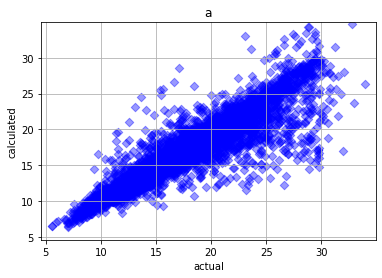

RMSE  b : 1.4265464470433407


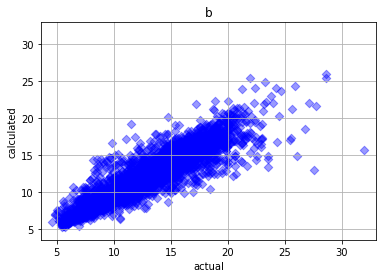

RMSE  c : 1.1019705756946352


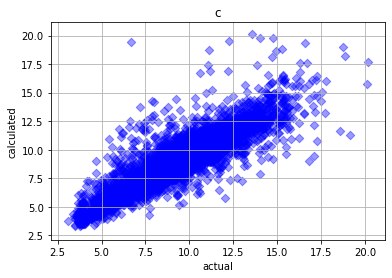

RMSE  alpha : 10.638936860516933


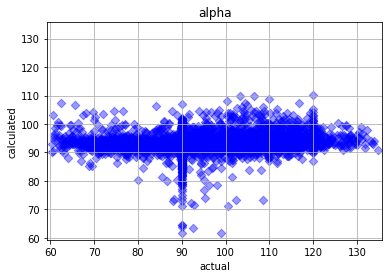

RMSE  beta : 9.31413210628098


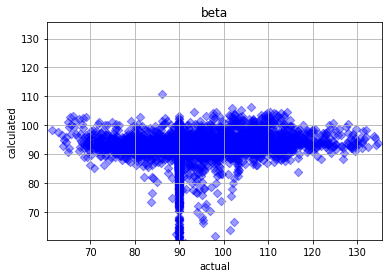

RMSE  gamma : 10.699042351066707


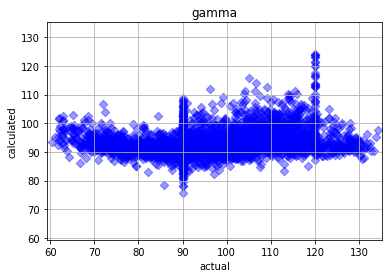

In [20]:
print('RMSE unit vectors (angstroms):', ((dfact.iloc[:,1:4].values - dfpred.iloc[:,1:4].values)**2).mean()**0.5)
print('RMSE angles (degrees):', ((dfact.iloc[:,4:7].values - dfpred.iloc[:,4:7].values)**2).mean()**0.5)
print('Now, it is compared calculated vs. actual values. Unit vectors are in angstroms and angles in degrees.','\n')
for lp, row in zip(['a','b', 'c', 'alpha','beta','gamma'], range(1,7)):
    
    print('RMSE ', lp, ':', ((dfact.iloc[:,row].values - dfpred.iloc[:,row].values)**2).mean()**0.5)
    plt.figure()
    plt.title(lp)
    plt.scatter(dfact.iloc[:,row].values, dfpred.iloc[:,row].values, marker='D', color='blue', alpha=0.4)
    plt.xlim(dfact.iloc[:,row].min()-1, dfact.iloc[:,row].max()+1)
    plt.ylim(dfact.iloc[:,row].min()-1, dfact.iloc[:,row].max()+1)
    plt.ylabel('calculated')
    plt.xlabel('actual')
    plt.grid(True)
    plt.show()

In [21]:
dfpred  = dfpred.rename(columns={0:'a', 1:'b', 2:'c', 3:'alpha', 4:'beta', 5:'gamma'})
dfpred.to_csv('refined_latpar_macro.csv', index=None)